In [ ]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
pima_df = pd.read_csv('pima.csv')

for i in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
  pima_df[i] = pima_df[i].replace([0],[None])

In [ ]:
pima_df.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [ ]:
null = pima_df['plasma_glucose_concentration'].isnull()
null_ind = pima_df[null].index ##查出plasma_glucose_concentration有缺失的資料
null_ind

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [ ]:
pima_df['plasma_glucose_concentration'] = pima_df['plasma_glucose_concentration'].fillna(pima_df['plasma_glucose_concentration'].mean())

In [ ]:
pima_df.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [ ]:
pima_df.loc[null_ind]

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
75,1,121.686763,48,20,None,24.7,0.140,22,0
182,1,121.686763,74,20,23,27.7,0.299,21,0
342,1,121.686763,68,35,None,32,0.389,22,0
349,5,121.686763,80,32,None,41,0.346,37,1
502,6,121.686763,68,41,None,39,0.727,41,1


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
pima_imputed = imputer.fit_transform(pima_df)

In [ ]:
type(pima_imputed)

numpy.ndarray

In [ ]:
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima_imputed = pd.DataFrame(pima_imputed, columns=pima_column_names)

In [ ]:
pima_imputed

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


In [ ]:
pima_df

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72,35,None,33.6,0.627,50,1
1,1,85.0,66,29,None,26.6,0.351,31,0
2,8,183.0,64,None,None,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0
764,2,122.0,70,27,None,36.8,0.340,27,0
765,5,121.0,72,23,112,26.2,0.245,30,0
766,1,126.0,60,None,None,30.1,0.349,47,1


In [ ]:
#MinMaxScaling
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
glucose_min_max_standardized = MinMaxScaler().fit_transform(pima_imputed[['plasma_glucose_concentration']])
glucose_min_max_standardized

array([[0.67096774],
       [0.26451613],
       [0.89677419],
       [0.29032258],
       [0.6       ],
       [0.46451613],
       [0.21935484],
       [0.45806452],
       [0.98709677],
       [0.52258065],
       [0.42580645],
       [0.8       ],
       [0.61290323],
       [0.93548387],
       [0.78709677],
       [0.36129032],
       [0.47741935],
       [0.40645161],
       [0.38064516],
       [0.45806452],
       [0.52903226],
       [0.35483871],
       [0.98064516],
       [0.48387097],
       [0.63870968],
       [0.52258065],
       [0.66451613],
       [0.34193548],
       [0.6516129 ],
       [0.47096774],
       [0.41935484],
       [0.73548387],
       [0.28387097],
       [0.30967742],
       [0.50322581],
       [0.38064516],
       [0.60645161],
       [0.37419355],
       [0.29677419],
       [0.43225806],
       [0.87741935],
       [0.57419355],
       [0.4       ],
       [0.81935484],
       [0.74193548],
       [0.87741935],
       [0.65806452],
       [0.174

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Min Max Scaling')

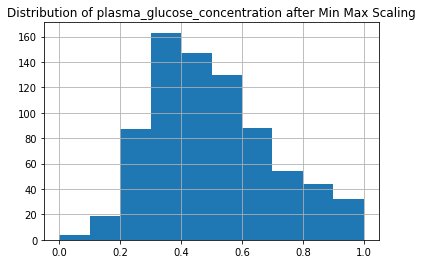

In [ ]:
ax = pd.Series(glucose_min_max_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Min Max Scaling')

In [ ]:
pima_standardized = MinMaxScaler().fit_transform(pima_imputed)
pima_standardized

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.10119556, 0.03333333,
        0.        ]])

In [ ]:
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima_standardized = pd.DataFrame(pima_standardized, columns=pima_column_names)

In [ ]:
pima_standardized

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30ffbacb10>,
      dtype=object)

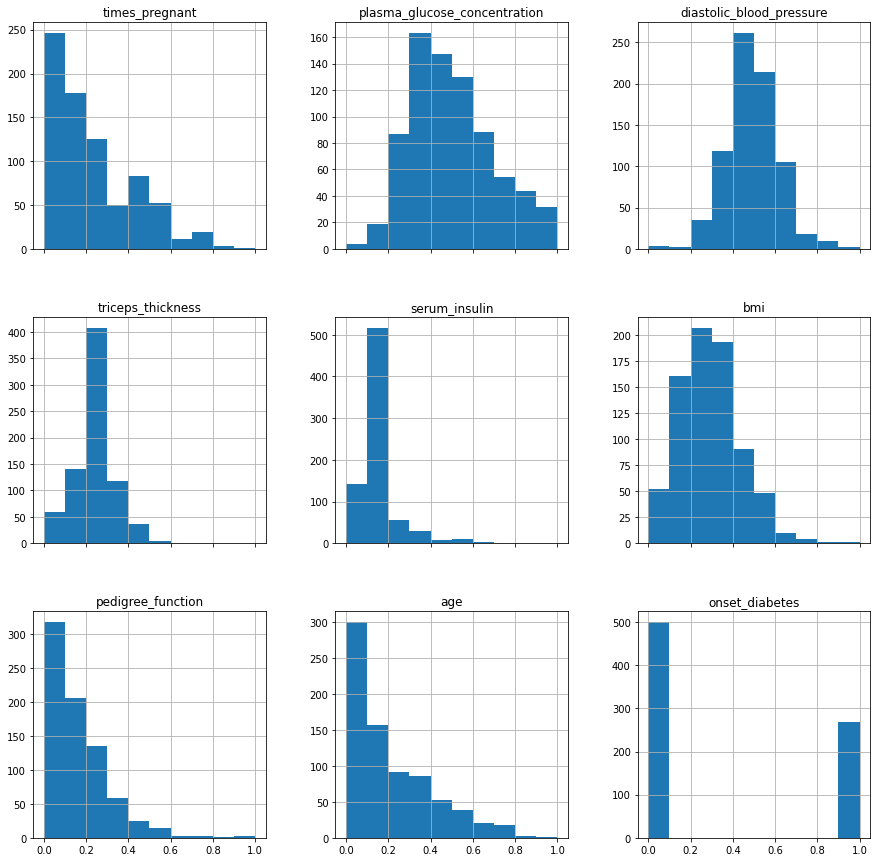

In [ ]:
pima_standardized.hist(figsize=(15, 15), sharex=True)

In [ ]:
#z分數標準化
print(pima_imputed['plasma_glucose_concentration'].head())

mu = pima_imputed['plasma_glucose_concentration'].mean()
sigma = pima_imputed['plasma_glucose_concentration'].std()
z = (pima_imputed['plasma_glucose_concentration'] - mu ) / sigma

print(z.head())

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose_concentration, dtype: float64
0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: plasma_glucose_concentration, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
#z分數標準化前的平均數、標準差
pima_imputed['plasma_glucose_concentration'].mean() , pima_imputed['plasma_glucose_concentration'].std()

(121.68676277850587, 30.43594886720766)

Text(0.5, 1.0, 'Distrubution of plasma_glucose_concentration')

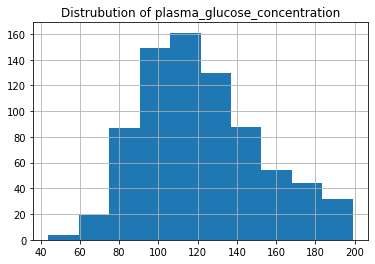

In [ ]:
ax = pima_imputed['plasma_glucose_concentration'].hist()
ax.set_title('Distrubution of plasma_glucose_concentration')

In [ ]:
#z分數標準化後的平均數、標準差
scaler = StandardScaler()
glucose_z_score = scaler.fit_transform(pima_imputed[['plasma_glucose_concentration']])
glucose_z_score.mean(), glucose_z_score.std()

(-3.561965537339044e-16, 1.0)

Text(0.5, 1.0, 'Distrubution of plasma_glucose_concentration after Z Score Scaling')

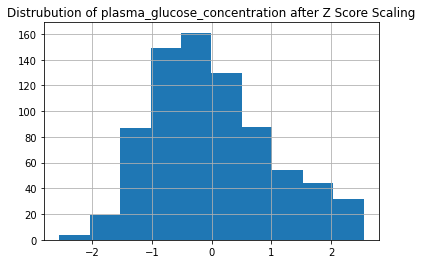

In [ ]:
ax = pd.Series(glucose_z_score.reshape(-1,)).hist()
ax.set_title('Distrubution of plasma_glucose_concentration after Z Score Scaling')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30fa48c090>,
      dtype=object)

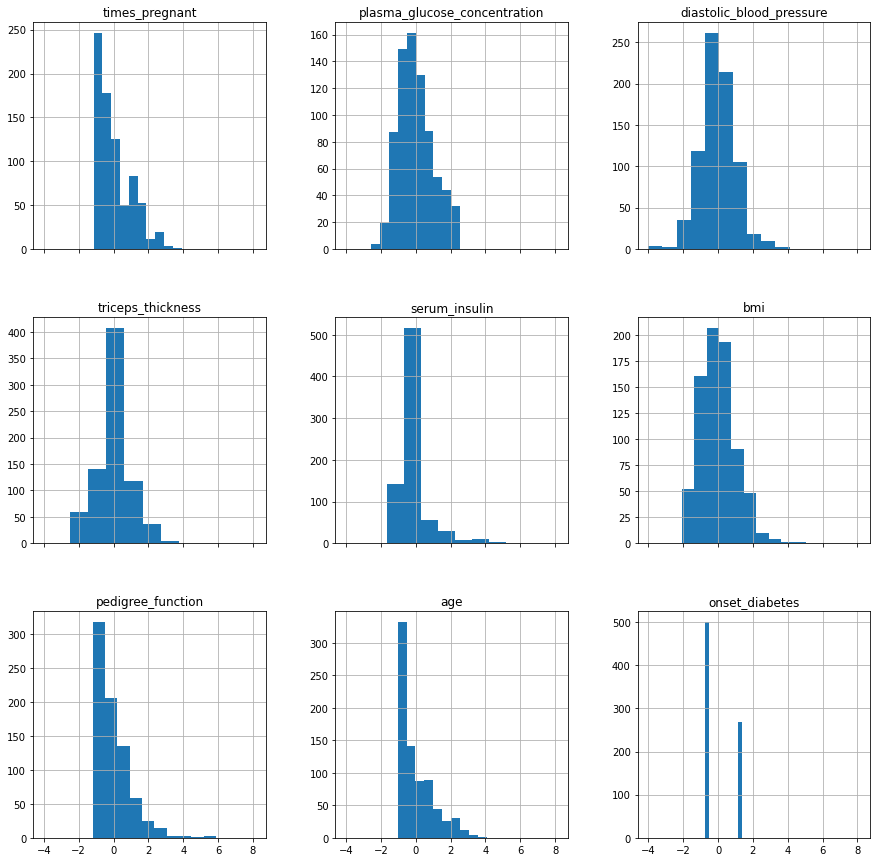

In [ ]:
pima_z_score = StandardScaler().fit_transform(pima_imputed)
pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima_z_score = pd.DataFrame(pima_z_score, columns=pima_column_names)
pima_z_score.hist(figsize=(15, 15), sharex=True)